In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as DT

from pandas_profiling import ProfileReport

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Now that our data is clean and filtered, let's see what trends we can identify

In [2]:
crash_data = pd.read_csv('../Crash_Classification_Data.csv')

In [27]:
crash = ProfileReport(crash_data, title='EDA Report')

crash.to_file(output_file='EDA_Report.html')

In [3]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170023 entries, 0 to 170022
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                170023 non-null  object 
 1   RD_NO                          170023 non-null  object 
 2   POSTED_SPEED_LIMIT             170023 non-null  float64
 3   TRAFFIC_CONTROL_DEVICE         170023 non-null  object 
 4   DEVICE_CONDITION               170023 non-null  object 
 5   WEATHER_CONDITION              170023 non-null  object 
 6   LIGHTING_CONDITION             170023 non-null  object 
 7   FIRST_CRASH_TYPE               170023 non-null  object 
 8   TRAFFICWAY_TYPE                170023 non-null  object 
 9   ROADWAY_SURFACE_COND           170023 non-null  object 
 10  ROAD_DEFECT                    170023 non-null  object 
 11  REPORT_TYPE                    170023 non-null  object 
 12  CRASH_TYPE                    

Hmm, so it seems our datetime objects didn't maintain their type. We'll need to change this and potentially create new columns to measure Time_before_notification in a easier to identify numerical way. Perhaps number of minutes elapsed.

Other things of note identified in the EDA report:
* At this point, I don't believe the intersection_related column will prove useful due to the amount of missing data and no real way to assume or accurately predict these missing values
* The Weather column can most likely be binarized
* Roadway surface and Road Defect can also be binarized
* Crash_type can be converted into a binary column too
* Crash day/month/hour may need to be converted into objects - debatable


### Is there a strong relationship between the number of injuries and the amount of time elapsed before the police are notified?

In [14]:
sns.set_palette('Set2', )
sns.set_style('darkgrid')

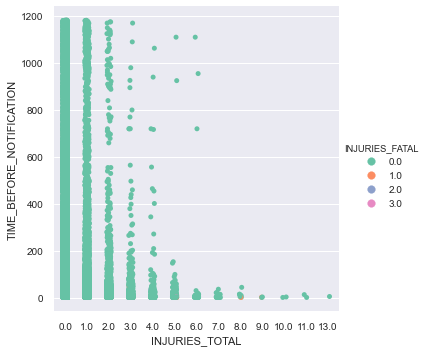

In [16]:
sns.catplot(data=crash_data, x='INJURIES_TOTAL', y='TIME_BEFORE_NOTIFICATION', hue='INJURIES_FATAL')


In [64]:
injuries = crash_data.groupby('INJURIES_TOTAL').mean().reset_index()

In [65]:
injuries

,INJURIES_TOTAL,POSTED_SPEED_LIMIT,HIT_AND_RUN_I,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_PRESENT,STRAIGHT_ROAD,LEVEL_ROAD,TIME_BEFORE_NOTIFICATION,TOTAL_PEOPLE_INVOLVED,DRY_ROAD,CLEAR_WEATHER,DRIVER_ERROR
0,0.0,28.536567,0.208069,3563.943891,1263.164026,2.029992,0.000000,0.000000,0.000000,0.000000,...,41.859874,-87.672000,0.462789,0.989845,0.981613,100.389045,2.279435,0.757291,0.799390,0.900769
1,1.0,29.458770,0.188419,3546.153256,1243.027135,2.093067,0.003575,0.110414,0.532263,0.353748,...,41.850211,-87.657923,0.587880,0.987107,0.972455,49.191057,2.520600,0.742835,0.779933,0.859462
2,2.0,30.116880,0.128568,3748.560478,1160.788801,2.227236,0.004077,0.191628,1.040500,0.763795,...,41.844674,-87.676824,0.637401,0.986681,0.971188,36.980429,3.357162,0.751835,0.787442,0.869530
3,3.0,30.209854,0.126825,3874.864051,1102.517336,2.265511,0.007299,0.312044,1.597628,1.083029,...,41.836351,-87.674958,0.656934,0.989051,0.969891,28.264599,4.194343,0.742701,0.775547,0.884124
4,4.0,30.224090,0.106443,3683.991597,1106.504202,2.341737,0.005602,0.470588,2.296919,1.226891,...,41.835036,-87.675352,0.669468,0.977591,0.974790,30.369748,5.170868,0.784314,0.817927,0.887955
5,5.0,30.181159,0.086957,4213.355072,925.014493,2.391304,0.036232,0.442029,2.594203,1.927536,...,41.824273,-87.663963,0.673913,0.992754,0.927536,30.297101,6.173913,0.775362,0.731884,0.833333
6,6.0,30.851064,0.148936,4019.340426,1069.361702,2.382979,0.000000,0.829787,3.808511,1.361702,...,41.836914,-87.661491,0.723404,1.000000,0.957447,66.000000,6.936170,0.808511,0.808511,0.872340
7,7.0,30.000000,0.136364,5002.409091,883.636364,2.818182,0.000000,0.272727,4.227273,2.500000,...,41.808333,-87.670393,0.590909,1.000000,0.954545,8.409091,7.818182,0.818182,0.818182,1.000000
8,8.0,29.375000,0.000000,4143.125000,687.750000,2.250000,0.125000,0.250000,5.625000,2.000000,...,41.810346,-87.656052,0.625000,1.000000,1.000000,13.625000,8.875000,0.875000,1.000000,1.000000
9,9.0,30.000000,0.333333,4049.000000,1122.666667,4.000000,0.333333,0.666667,6.666667,1.333333,...,41.822647,-87.641523,1.000000,1.000000,1.000000,3.000000,10.000000,1.000000,1.000000,1.000000


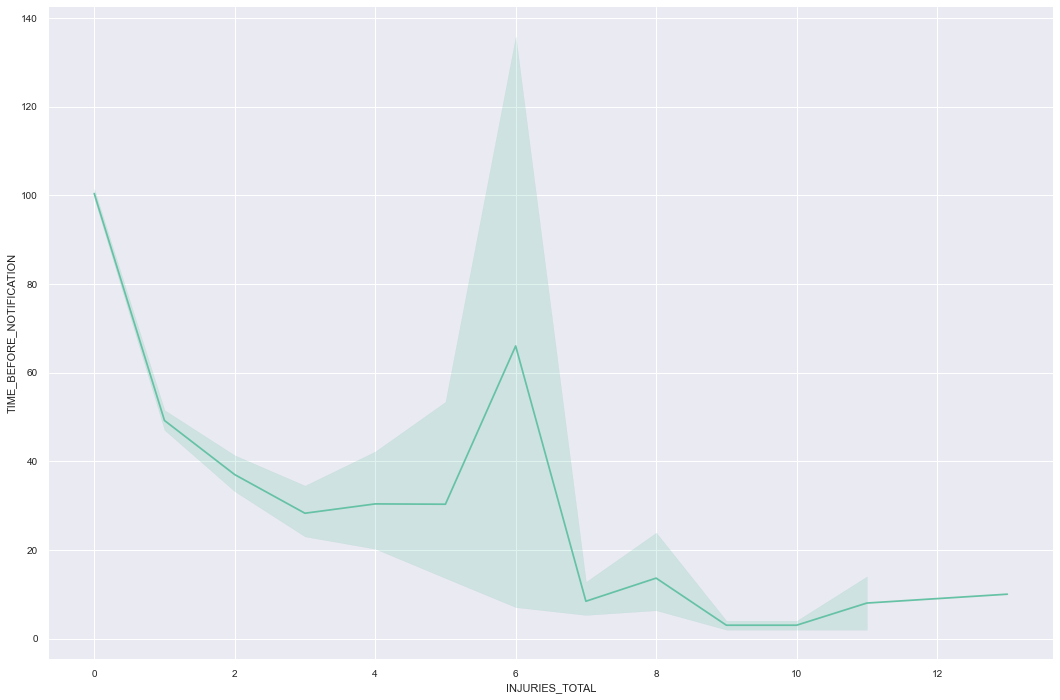

In [86]:
fig, ax = plt.subplots(figsize=(18,12))
sns.lineplot(data=crash_data, x='INJURIES_TOTAL', y='TIME_BEFORE_NOTIFICATION',  ax=ax)

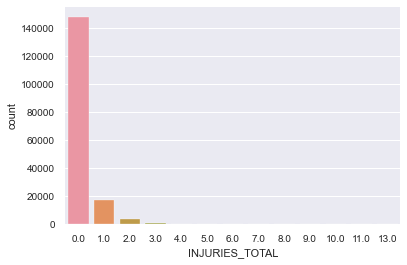

In [60]:
sns.countplot(x='INJURIES_TOTAL', data=crash_data)

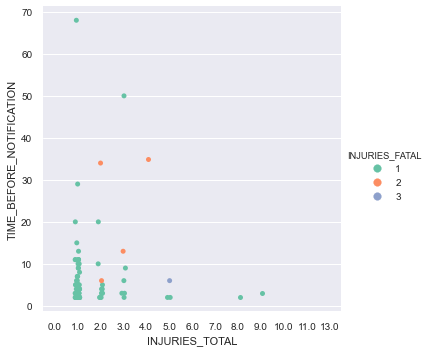

In [17]:
sns.catplot(data=crash_data, x='INJURIES_TOTAL', y='TIME_BEFORE_NOTIFICATION', hue='INJURIES_FATAL', hue_order=[1,2,3])

([<matplotlib.axis.XTick at 0x2602779c668>,
 <a list of 13 Text major ticklabel objects>)

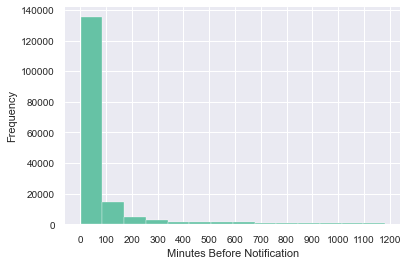

In [31]:
plt.hist(data=crash_data, x='TIME_BEFORE_NOTIFICATION', bins=14)
plt.xlabel('Minutes Before Notification')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1300, 100))

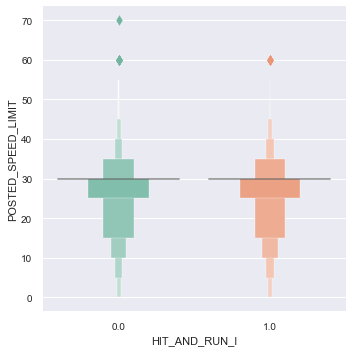

In [20]:
sns.catplot(data=crash_data, x='HIT_AND_RUN_I', y='POSTED_SPEED_LIMIT', kind='boxen')

Interestingly, there doesn't appear to much differnce between speed limit and likelyhood of a hit-and-run.

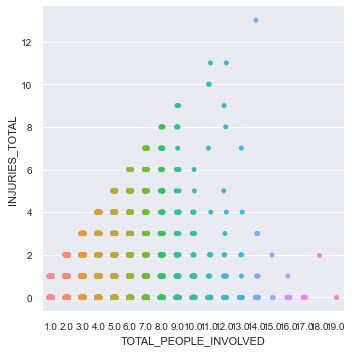

In [21]:
sns.catplot(data=crash_data, x='TOTAL_PEOPLE_INVOLVED', y='INJURIES_TOTAL')

This does appear to indicate that the more people involved are more likely to result in more injuries...to an extent.

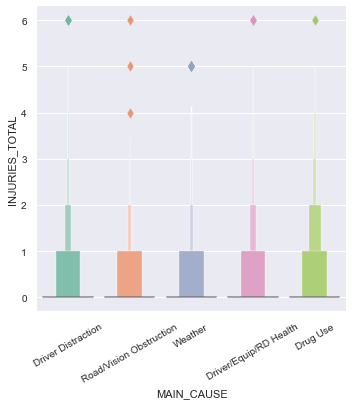

In [22]:
plot = sns.catplot(data=crash_data.query("MAIN_CAUSE != 'Driver Error'"), x='MAIN_CAUSE', y='INJURIES_TOTAL', kind='boxen')
plot.set_xticklabels(rotation=30)

[Text(0, 0, 'Driver Distraction'),
 Text(0, 0, 'Road/View Obstruction'),
 Text(0, 0, 'Weather'),
 Text(0, 0, 'Driver/Equip/RD Health'),
 Text(0, 0, 'Drug Use')]

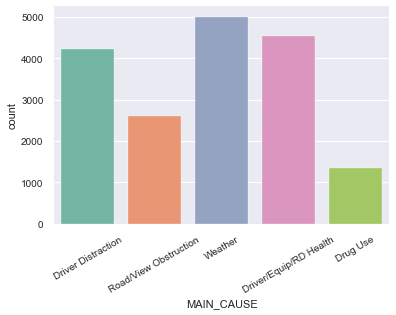

In [38]:
plot = sns.countplot(x='MAIN_CAUSE', data=crash_data.query("MAIN_CAUSE != 'Driver Error'"))
plot.set_xticklabels(rotation=30, labels=['Driver Distraction', 'Road/View Obstruction', 'Weather', 'Driver/Equip/RD Health', 'Drug Use'])

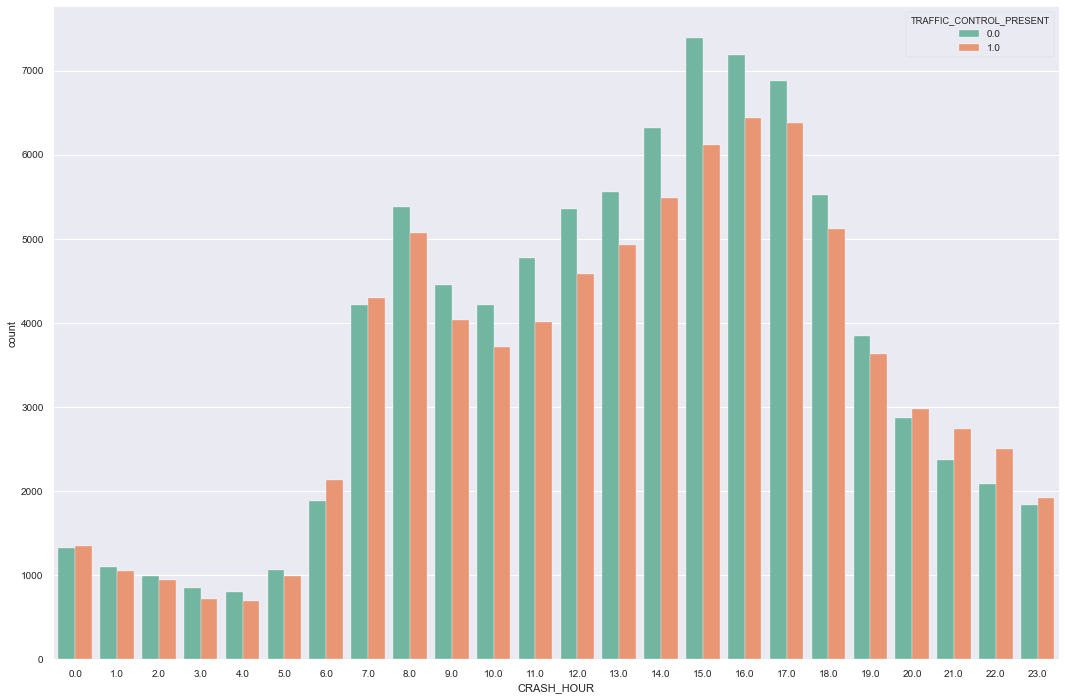

In [23]:
fig, ax = plt.subplots(figsize=(18,12))
sns.countplot(x='CRASH_HOUR', data=crash_data, hue='TRAFFIC_CONTROL_PRESENT', ax=ax)

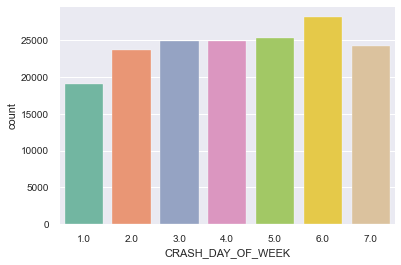

In [32]:
sns.countplot(x='CRASH_DAY_OF_WEEK', data=crash_data)

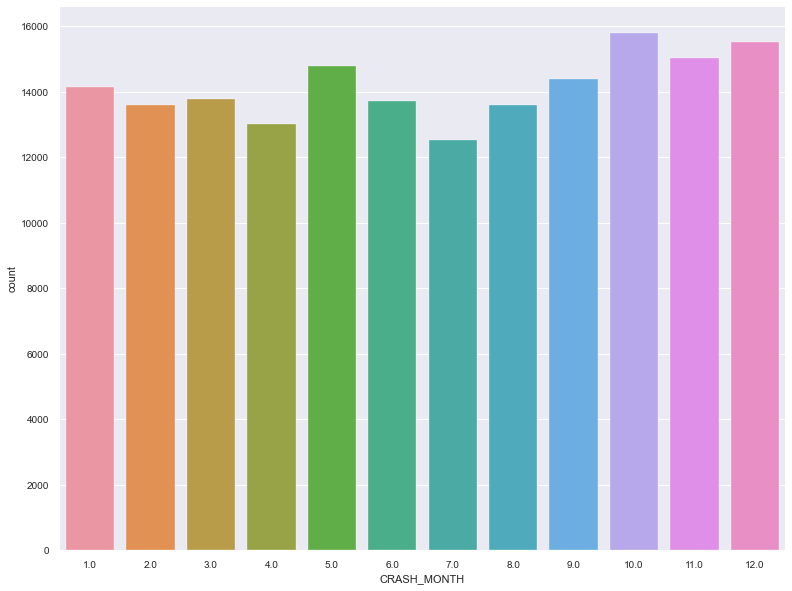

In [33]:
fig, ax = plt.subplots(figsize=(13,10))
sns.countplot(x='CRASH_MONTH', data=crash_data, ax=ax)

In [66]:
fatalities = crash_data.groupby('INJURIES_FATAL').mean().reset_index()

In [67]:
fatalities

,INJURIES_FATAL,POSTED_SPEED_LIMIT,HIT_AND_RUN_I,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_PRESENT,STRAIGHT_ROAD,LEVEL_ROAD,TIME_BEFORE_NOTIFICATION,TOTAL_PEOPLE_INVOLVED,DRY_ROAD,CLEAR_WEATHER,DRIVER_ERROR
0,0.0,28.679738,0.203547,3569.003331,1257.238855,2.04331,0.178096,0.018801,0.095212,0.064083,...,41.858340,-87.670708,0.481075,0.989484,0.980328,93.224073,2.351138,0.755720,0.797024,0.895890
1,1.0,29.024390,0.134146,4153.963415,1101.451220,2.02439,1.560976,0.146341,0.353659,0.060976,...,41.829686,-87.668690,0.463415,0.975610,0.975610,6.597561,2.548780,0.792683,0.792683,0.670732
2,2.0,31.250000,0.000000,7870.250000,398.000000,2.25000,2.750000,0.750000,0.000000,0.000000,...,41.751114,-87.624115,0.750000,1.000000,1.000000,22.000000,3.000000,0.750000,1.000000,0.750000
3,3.0,30.000000,0.000000,520.000000,123.000000,1.00000,5.000000,2.000000,0.000000,0.000000,...,41.875260,-87.624397,1.000000,1.000000,1.000000,6.000000,5.000000,1.000000,1.000000,0.000000


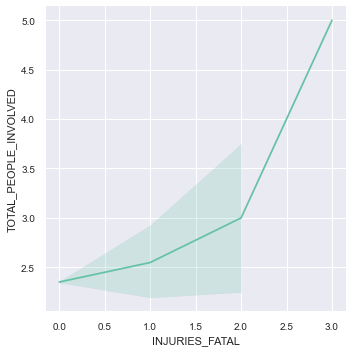

In [73]:
sns.relplot(data=crash_data, x='INJURIES_FATAL', y='TOTAL_PEOPLE_INVOLVED', kind='line')

In [74]:
causes = crash_data.groupby('MAIN_CAUSE').mean().reset_index()

In [75]:
causes

,MAIN_CAUSE,POSTED_SPEED_LIMIT,HIT_AND_RUN_I,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,...,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_PRESENT,STRAIGHT_ROAD,LEVEL_ROAD,TIME_BEFORE_NOTIFICATION,TOTAL_PEOPLE_INVOLVED,DRY_ROAD,CLEAR_WEATHER,DRIVER_ERROR
0,Driver Distraction,28.893617,0.066667,3737.783215,1229.508274,2.058629,0.225059,0.001655,0.019858,0.117967,...,41.848557,-87.672591,0.447754,0.988180,0.977305,72.472104,2.291962,0.830969,0.855556,0.0
1,Driver Error,28.674541,0.217942,3541.758053,1256.832550,2.050590,0.173071,0.000401,0.017872,0.091568,...,41.859247,-87.671069,0.490420,0.990841,0.981845,95.147726,2.385051,0.776595,0.815840,1.0
2,Driver/Equip/RD Health,28.781346,0.055653,3847.337000,1227.635944,1.896172,0.262648,0.004179,0.036516,0.153542,...,41.839529,-87.657658,0.325561,0.979322,0.963924,80.475143,1.808843,0.765508,0.820941,0.0
3,Drug Use,28.977695,0.231227,3715.165799,1310.931599,2.318959,0.353903,0.002974,0.073606,0.200743,...,41.864252,-87.684078,0.350929,0.985874,0.981413,28.696654,2.040149,0.776952,0.820818,0.0
4,Road/Vision Obstruction,27.807085,0.039276,3891.398922,1287.377358,1.901040,0.225645,0.000770,0.025414,0.128225,...,41.862828,-87.680668,0.356565,0.981902,0.967655,64.855218,2.078937,0.785137,0.812861,0.0
5,Weather,28.945633,0.091945,3808.567460,1286.406156,1.941835,0.168299,0.000000,0.014991,0.092544,...,41.851640,-87.661139,0.465721,0.963222,0.957825,94.373176,2.090746,0.027384,0.138517,0.0


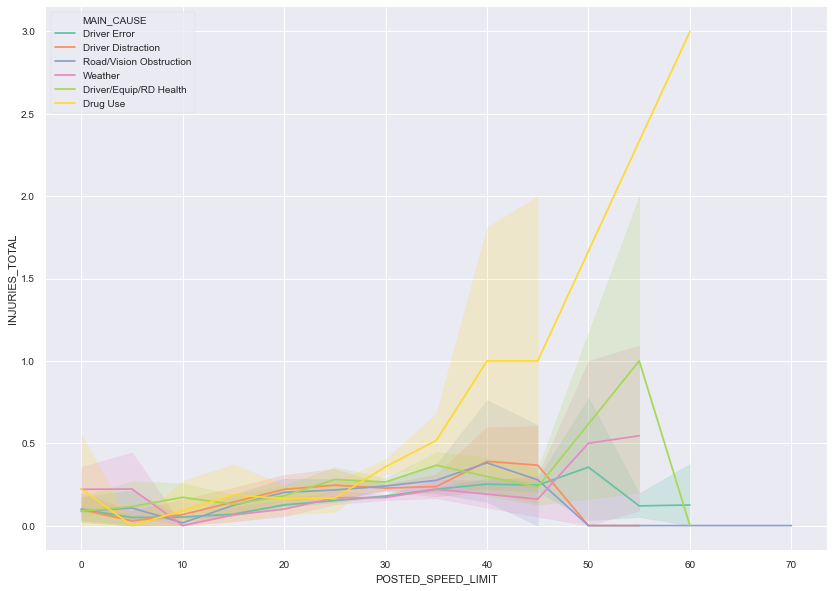

In [88]:
fig, ax = plt.subplots(figsize=(14,10))
sns.lineplot(data=crash_data, x='POSTED_SPEED_LIMIT', hue='MAIN_CAUSE', y='INJURIES_TOTAL', ax=ax)